DATA MINING & ANALYTICS (2022)

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your name below:

In [ ]:
NAME = "Kylie Ren"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully.**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/d/18wwyjGku2HYfgDX9Vez64lGHz31E_PfbpmAdfb7ly6M/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments).
    - This can typically look like taking in another argument `random_state = 42` when applicable.
- The points allotted per question is listed.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers themselves.
- If a question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out!
- You can delete the `raise NotImplementedError()` when you are attempting the question.
- **Submitting the assignment** : Save your work as a PDF (Print -> Save as PDF), download the `.ipynb` file from Colab (Download -> Download as .ipynb), and upload these two files to Gradescope. **Run all cells before submitting.**
- **MAKE A COPY OF THIS FILE FOR YOURSELF TO EDIT/SAVE.**
- That's about it. Happy coding!

In [ ]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

#DOWNLOADING DATASET
!wget -nc http://askoski.berkeley.edu/~zp/yelp_reviewers.csv
# !unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv', delimiter= ',')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

File ‘yelp_reviewers.csv’ already there; not retrieving.

Dataset Downloaded: yelp_reviewers.csv
                q3           q4           q5           q6           q7  \
count  7177.000000  7177.000000  7177.000000  7177.000000  7177.000000   
mean      6.838651     5.281455     4.750871     8.808973     1.539160   
std       7.597977    16.208703    13.866352    19.980443     0.885421   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       3.000000     1.000000     1.000000     2.000000     1.100000   
50%       5.000000     2.000000     2.000000     5.000000     1.610000   
75%       9.000000     4.000000     4.000000     9.000000     2.200000   
max     252.000000   607.000000   474.000000   773.000000     5.530000   

                q8           q9          q10          q11          q12  ...  \
count  7177.000000  7177.000000  7177.000000  7177.000000  7177.000000  ...   
mean      0.934928     0.870281     1.549898    26.732782    25.660616  ...   

In [ ]:
df.head().T

,129451,116706,144394,24699,47453
user_id,kIWQXgjmVdgEs9BOgr8G5A,fXU_-5DBmNlGhI8fbX-2vQ,prF_lbKywPnZhNqvJOOaDw,8GHUeOm807bI5Qh4X3CHBA,Gd_IGX3BmRYbPD84ovLEoA
q3,1,1,1,1,8
q4,0,0,0,0,2
q5,0,0,0,0,1
q6,0,0,0,0,8
q7,0.0,0.0,0.0,0.0,2.08
q8,NaN,NaN,NaN,NaN,0.69
q9,NaN,NaN,NaN,NaN,0.0
q10,NaN,NaN,NaN,NaN,2.08
q11,NaN,NaN,NaN,NaN,18.18


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. (hint: take a look at `silhouette_score`).


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters. The preferred approach for this lab is to treat the empty clusters as “singletons”, leaving them empty with single point placeholders (so no need to drop anything for the purposes of the lab).


In [ ]:
df.head(3)

,user_id,q3,q4,q5,q6,q7,q8,q9,q10,q11,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
129451,kIWQXgjmVdgEs9BOgr8G5A,1,0,0,0,0.0,NaN,NaN,NaN,NaN,...,no,0.0,13,3,0.000000,101.0,0,0,NaN,3.0
116706,fXU_-5DBmNlGhI8fbX-2vQ,1,0,0,0,0.0,NaN,NaN,NaN,NaN,...,no,0.0,35,1,0.007576,23.0,0,0,0.0,1.0
144394,prF_lbKywPnZhNqvJOOaDw,1,0,0,0,0.0,NaN,NaN,NaN,NaN,...,no,2.0,36,3,0.001685,363.0,0,0,NaN,3.0


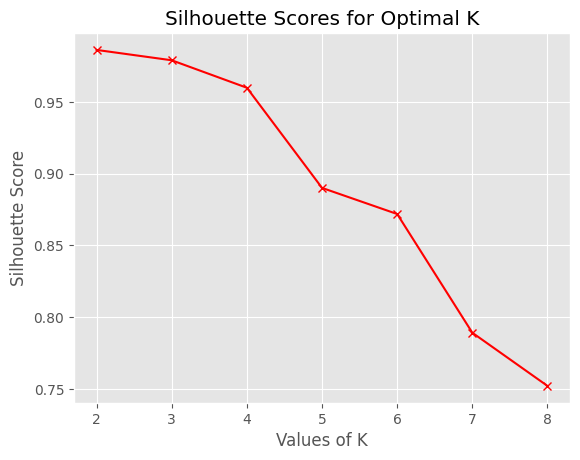

None


In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q1(df):
  df1 = df[['q4', 'q5', 'q6']]
  df1 = pd.DataFrame(df1)
  rng = [2, 3, 4, 5, 6, 7, 8]
  sil = []

  for num_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(df1)
    lab = kmeans.labels_
    score = silhouette_score(df1, lab)
    sil.append(score)

  plt.plot(rng, sil, 'rx-')
  plt.xlabel('Values of K')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Scores for Optimal K')
  plt.show()

  # For KMeans use argument n_init = 10 when applicable
print(q1(df))

What is the best choice of k?

The best choice of k is 2 with a silhouette score of 0.98.

### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8.

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q7-q10), then replace the missing values with 0. We do this since the missing values from q7-q10 are most commonly because of taking the log's of values of 0 from q3-q6.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

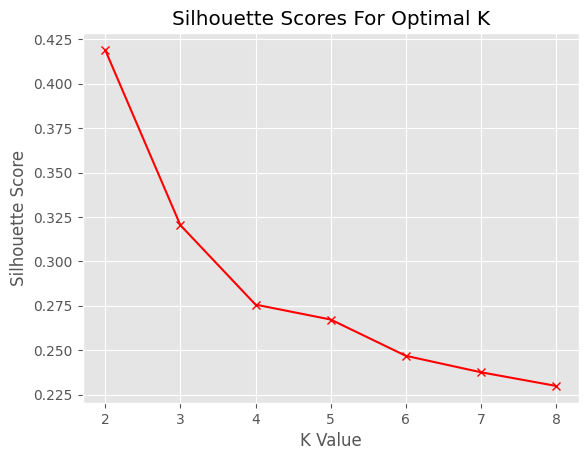

None


In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q2(df):
  df1 = df[['q7', 'q8', 'q9', 'q10']]
  df1 = df1.dropna(how='any')
  df1_arr = np.array(df1)
  clusters = [2, 3, 4, 5, 6, 7, 8]
  silhouette = []

  for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df1_arr)
    score = silhouette_score(df1_arr, kmeans.labels_)
    silhouette.append(score)

  plt.plot(clusters, silhouette, 'rx-')
  plt.ylabel('Silhouette Score')
  plt.xlabel('K Value')
  plt.title('Silhouette Scores For Optimal K')
  plt.show()
  #raise NotImplementedError()

print(q2(df))

What is the best choice of k?

The best choice of k is 2 with a silhouette score of 0.42.

### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8.

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q11-q13), then drop rows that have missing values.

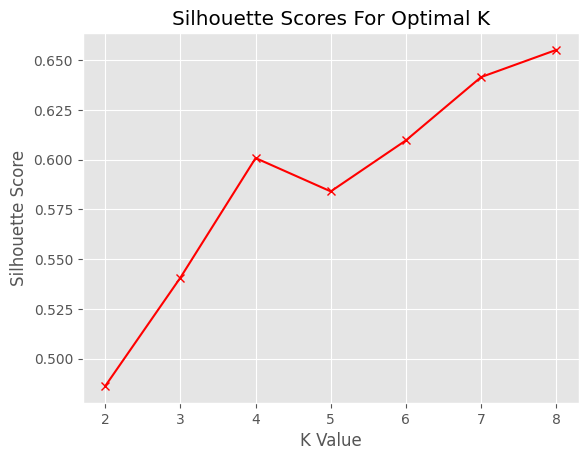

None


In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q3(df):
  df1 = df[['q11', 'q12', 'q13']]
  df1 = df1.dropna(how='any')
  df1_arr = np.array(df1)
  clusters = [2, 3, 4, 5, 6, 7, 8]
  silhouette = []

  for i in clusters:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42).fit(df1_arr)
    score = silhouette_score(df1_arr, kmeans.labels_)
    silhouette.append(score)

  plt.plot(clusters, silhouette, 'rx-')
  plt.ylabel('Silhouette Score')
  plt.xlabel('K Value')
  plt.title('Silhouette Scores For Optimal K')
  plt.show()
  #raise NotImplementedError()

print(q3(df))

What is the best choice of k?

The best choice of K is 8 with a value of 0.64.

### Question 4 `(1 point)`
Take the best clustering (i.e., best value of K) from Question 3 and using the same subset of data from q11-q13, list the number of data points in each cluster. Return your answer in dictionary form (i.e. `ans = {0: 100, 1: 200, ...}`).

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an dictionary. Eg : {0:1000,1:500,2:1460}.
def q4(df):
  df1 = df[['q11', 'q12', 'q13']]
  df1 = df1.dropna(how='any')
  df1_arr = np.array(df1)
  kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(df1_arr)
  return pd.Series(kmeans.labels_).value_counts().to_dict()

In [ ]:
#This is an graded cell, do not edit
print(q4(df))

{0: 9831, 6: 5724, 7: 3301, 5: 3216, 4: 3037, 1: 2140, 2: 1632, 3: 1228}


### Question 5 `(1 point)`
Consider the best clustering from Question 3. Were there clusters that represented very funny but useless reviewers (check column definitions for columns corresponding to funny, useless, etc.)?  If so, print the center of that cluster.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a list. Eg : [10, 30, 54].
def q5(df):
  kmeans = KMeans(n_clusters=8, n_init=10, random_state=42)
  df1 = df[['q11', 'q12', 'q13']]
  df1 = df1.dropna(how='any')
  cluster_labels = kmeans.fit(df1)
  return kmeans.cluster_centers_[3]

In [ ]:
#This is a graded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

[98.2  1.   0.9]


### Question 6 `(1 point)`
Consider the best clustering from Question 3. What was the centroid of the cluster that represented relatively uniform strength in all voting categories?

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a centroid in list form. Eg : [10, 10.5, 13].
def q6(df):
  kmeans = KMeans(n_clusters=8, n_init=10, random_state=42)
  df1 = df[['q11', 'q12', 'q13']]
  df1 = df1.dropna(how='any')
  cluster_labels = kmeans.fit(df1)
  return kmeans.cluster_centers_[6]

In [ ]:
#This is a graded cell, do not edit
print(q6(df))

[31.455741   30.37879937 38.1627805 ]


### Question 7 `(1 point)`
Cluster the dataset using $k = 7$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

As before, fill NaN values in q7-q10 with 0, but drop rows that have NaN values from q11-q15.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a float.
def q7(df):
  df = df[['q7', 'q8', 'q9', 'q10','q11', 'q12', 'q13', 'q14', 'q15']]
  df[['q7', 'q8', 'q9', 'q10']] = df[['q7', 'q8', 'q9', 'q10']].fillna(value=0)
  df = df.dropna(how='any')
  kmeans = KMeans(n_clusters=7, n_init=10, random_state=42).fit(df)
  return silhouette_score(df, kmeans.labels_)

In [ ]:
#This is a graded cell, do not edit
print(q7(df))

<ipython-input-97-9d6aad1deb51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['q7', 'q8', 'q9', 'q10']] = df[['q7', 'q8', 'q9', 'q10']].fillna(value=0)


0.4757489954135929


### Question 8 `(1 point)`
Cluster the dataset using $k = 7$ and using features q7-q15 (refer to the column descriptions if needed).

What is the average q3 value in each of the clusters? Replace/fill NaN values for q7-q15 as you have done for previous questions.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an Array. Eg : [10, 30, 54].
def q8(df):
  df = df[['q3', 'q7', 'q8', 'q9', 'q10','q11', 'q12', 'q13', 'q14', 'q15']]
  df[['q7', 'q8', 'q9', 'q10']] = df[['q7', 'q8', 'q9', 'q10']].fillna(value=0.0)
  df = df.dropna(how='any')
  kmeans = KMeans(n_clusters=7, n_init=10, random_state=42).fit(df)
  df['labels'] = kmeans.labels_.tolist()
  res = df.groupby('labels')['q3'].mean()
  return res.tolist()

In [ ]:
#This is a graded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

<ipython-input-12-9fb0c4a94d33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['q7', 'q8', 'q9', 'q10']] = df[['q7', 'q8', 'q9', 'q10']].fillna(value=0.0)


[4.8 3.8 4.6 2.5 3.5 1.4 4.6]


### Question 9 `(2 points)`

We will now cluster the dataset using all features in the dataset.

We can drop features with high incidents of `-inf` / `NaN` / blank values. We will also perform some form of normalization on these features so as not to over bias the clustering towards the larger magnitude features.

Let's go ahead and get started.


#### Data Cleansing and Normalization ####
**Check how many null values there are in each column.**

In [ ]:
print(df.isna().sum())

user_id        0
q3             0
q4             0
q5             0
q6             0
q7             0
q8         35280
q9         36743
q10        24338
q11        21383
q12        21383
q13        21383
q14            0
q15            0
q16a           0
q16b           0
q16c           0
q16d           0
q16e           0
q16f           0
q16g           0
q16h           0
q16i           0
q16j           0
q16k           0
q16l           0
q16m           0
q16n           0
q16o           0
q16p           0
q16q           0
q16r           0
q16s           0
q16t           0
q16u           0
q16v           0
q16w           0
q16x           0
q16y           0
q16z           0
q16aa          0
q16ab      14469
q16ac          0
dtype: int64


It looks like q8 - q13 and q16ab have a lot of null values. Let's see what the impact is of removing the two columns with the most null values.

**Drop the two columns with the most NaN values, and then remove all rows with NaN values remaining.**

In [ ]:
df = df.drop(['q8', 'q9'], axis=1)
df = df.dropna()

By removing two features, we have effectively doubled the number of rows remaining than if we just removed all rows with a NaN value. That's pretty good.  

Now, let's preprocess categorical variables into dummy variables. (hint: look at `pd.get_dummies`).

In [ ]:
df_dummy = pd.get_dummies(df[['q16s', 'q16t']])
df1 = df.drop(['q16s', 'q16t'], axis=1)
df1 = df1.join(df_dummy).dropna()

Now, normalize the remaining values.

In [ ]:
normalized_df = normalize(df1.iloc[:, 1:])
normalized_df

array([[0.01184607, 0.00296152, 0.00148076, ..., 0.        , 0.00148076,
        0.        ],
       [0.00371281, 0.0018564 , 0.0018564 , ..., 0.        , 0.0018564 ,
        0.        ],
       [0.00758934, 0.00758934, 0.00474334, ..., 0.        , 0.00094867,
        0.        ],
       ...,
       [0.00380738, 0.00126913, 0.00253825, ..., 0.        , 0.00126913,
        0.        ],
       [0.06886213, 0.00724865, 0.00724865, ..., 0.        , 0.        ,
        0.00362432],
       [0.01288916, 0.02004981, 0.01575342, ..., 0.        , 0.00143213,
        0.        ]])

Using the the "sum of squared errors" metric along with the elbow method (make a graph and visually examine for the elbow), what is the best k to use for this dataset? (Hint: look at the `inertia_` attribute for k-means in sklearn).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Squared Error Sum')

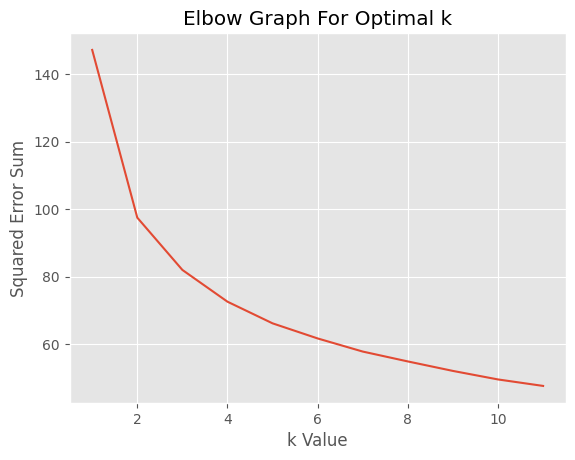

In [ ]:
# The return value should be a graph to visualize the elbow method and the value of k determined from that graph.
arr = [1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11]
inertia_holder = []

for i in arr:
  kmeans = KMeans(n_clusters=i, random_state=42).fit(normalized_df)
  inertia_holder.append(kmeans.inertia_)

plt.plot(arr, inertia_holder)
plt.title('Elbow Graph For Optimal k')
plt.xlabel('k Value')
plt.ylabel('Squared Error Sum')
# For KMeans use argument n_init = 10 when applicable.

**Answer: 3**

### Question 10 `(1 points)`
For this question, please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe the question you propose and how clustering can answer that question. Feel free to use additional cells if needed.


**Question: What is the best k value for clustering how many times 'great' appears in reviews, and occurrence of the f word in reviews? Use Silhouette_score.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

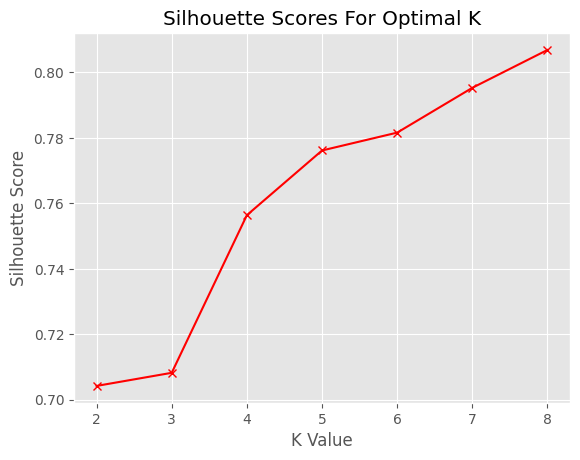

In [ ]:
df2 = np.array(df[['q16i', 'q16u']].dropna(how='any'))
dfcomp = df2.copy()
k_arr = [2, 3, 4, 5, 6, 7, 8]
labels_holder = []
silhouette = []

for i in k_arr:
  kmeans = KMeans(n_clusters=i, random_state=42).fit(df2)
  score = silhouette_score(df2, kmeans.labels_)
  silhouette.append(score)
  labels_holder.append(kmeans.labels_)

plt.plot(k_arr, silhouette, 'rx-')
plt.ylabel('Silhouette Score')
plt.xlabel('K Value')
plt.title('Silhouette Scores For Optimal K')
plt.show()

### **Written Answer**

**Answer:** The best value of k is 8 with a silhouette score of 0.805.

## Bonus question (`2 Points`) - Reviewer overlap:

Now, let's take a look back at what we were doing last week, and use that in junction with what we've learned from above today.

For this bonus question, please:
- Download last week's dataset
- Aggregate cool, funny, and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed.


**You should be returning a dataframe with the following structure in the end:**

Rows: user IDs as indices.

Columns: boolean columns describing if the user ID has a review for each of the labels determined from the K-Means clustering, a boolean column describing if the user ID has a review for all of the given labels, and a column composing of lists of cluster IDs that the given user ID has written reviews for.

In [ ]:
!wget -nc http
# For KMeans use argument n_init = 10 when applicable.

In [ ]:
#This is a graded cell, do not edit
print(bonus_df.head())

*ⓒ Prof. Zachary Pardos, 2022*